In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [4]:
iris = load_iris()

In [8]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
# загружаем данные в датафрейм
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data_class = iris.target

In [18]:
data_iris = data[['sepal length (cm)', 'sepal width (cm)']]


In [112]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_iris, data_class, test_size=0.25)

In [113]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [114]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [115]:
lda.predict(X_test)

array([2, 0, 1, 0, 2, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0,
       1, 0, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 1])

In [116]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7368421052631579

In [141]:
# small_train = X_train
# small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
# sy_train = y_train
# small_test = X_test
# small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
# sy_test = y_test

In [144]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

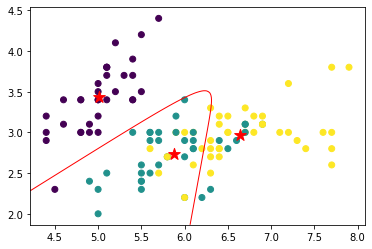

In [175]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'],  c=y_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1],  c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)


# отделяем друг от друга
plt.contour(xx, yy, Z, [0.49], linewidths=1., colors='r')

plt.show()

In [120]:
lda_small.means_

array([[5.01212121, 3.43030303],
       [5.87567568, 2.73783784],
       [6.6452381 , 2.96666667]])

## Кластеризация

In [109]:
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(data_iris, data_class, test_size=0.20)

In [108]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [126]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(data_iris)

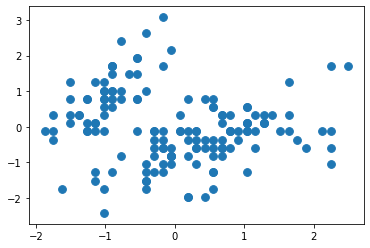

In [127]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [128]:
from sklearn.cluster import KMeans

In [129]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

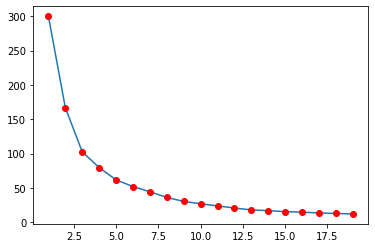

In [130]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [176]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)


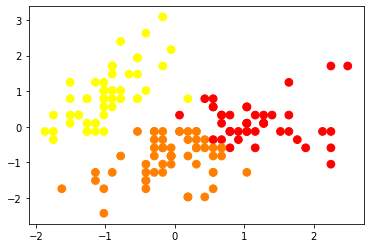

In [177]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)